<a href="https://colab.research.google.com/github/Lorenzopiloto/Statistics-DS/blob/main/An%C3%A1lise_de_Projetos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Projetos

Neste exercício iremos aplicar os conceitos apresentados sobre análise descritiva para analisar as entregas realizadas por um time de um projeto.

# Carregar Módulos

In [1]:
import numpy as np
import pandas as pd

# Carregar Dados

In [2]:
dados = pd.read_csv('projetos_entrega.csv')

In [3]:
dados.head()

,semana,entregas
0,25,2.0
1,26,9.0
2,27,10.0
3,28,1.0
4,29,6.0


# Análises

## 1 - Mostrar a evolução das entregas conforme as semanas (dica: eixo x - semanas, eixo y - entregas)

<Axes: xlabel='semana'>

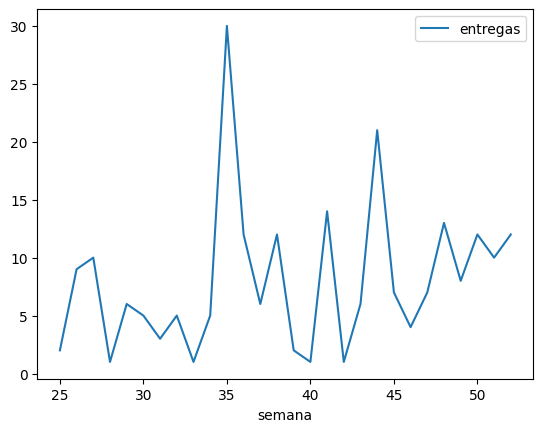

In [4]:
dados.plot(x = 'semana', y = 'entregas')

## 2 - Aplicar as medidas de posição no número de entregas(média, mediana, quartil 1, quartil 3, mínimo e máximo)

In [5]:
dados_resumo = dados.agg(min_entregas = pd.NamedAgg('entregas', 'min'),
                         max_entregas = pd.NamedAgg('entregas', 'max'),
                         media_entregas = pd.NamedAgg('entregas', 'mean')) \
                    .reset_index()

In [6]:
percentis = dados['entregas'].quantile([0.25, 0.5, 0.75]) \
                             .to_frame() \
                             .reset_index()

In [8]:
dados_resumo = pd.concat([dados_resumo, percentis]) \
                    .rename(columns={'index': 'metricas'}) \
                    .reset_index(drop=True)


In [9]:
dados_resumo

,metricas,entregas
0,min_entregas,1.000000
1,max_entregas,30.000000
2,media_entregas,8.035714
3,0.25,3.750000
4,0.5,6.500000
5,0.75,12.000000


## 3 - Aplicar as medidas de variabilidade no número de entregas (variância e desvio padrão)

In [10]:
dados.agg(variancia_idh = pd.NamedAgg('entregas', 'var'),
          dp_idh = pd.NamedAgg('entregas', 'std')) \
     .reset_index()

,index,entregas
0,variancia_idh,42.109788
1,dp_idh,6.489206
